In [1]:
#Importing libraries
import numpy as np
import pandas as pd

# To import file
from google.colab import files
uploaded = files.upload()

# For Vizualization
import seaborn as sns
import matplotlib.pyplot as plt

# Extra
import warnings
warnings.filterwarnings(action='ignore')

Saving day.csv to day.csv


In [2]:
# Reading into a pandas dataframe
df=pd.read_csv("day.csv")

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#Checking null values / missing if any
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# there are no missing values

In [8]:
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [9]:
# from the dataset we can drop instant, dteday, casual & registered columns as they are not needed in analysis
df = df.drop(columns=['instant', 'dteday', 'casual', 'registered'],axis=1)

In [10]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
# create list of categorical and numerical columns
num_columns = ['temp','atemp','hum','windspeed','cnt']
cat_columns = ['season','mnth','holiday','weekday','workingday','weathersit']

In [12]:
## Univariate Analysis

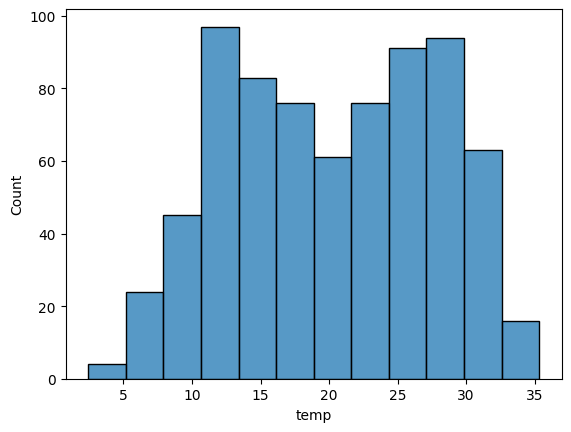

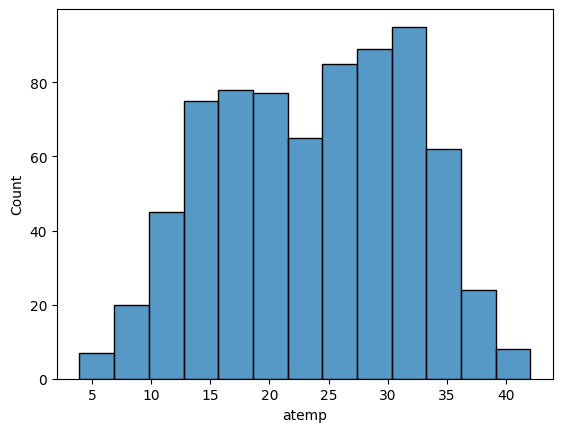

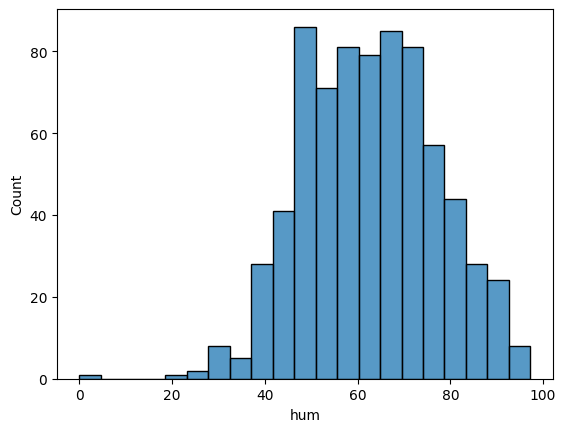

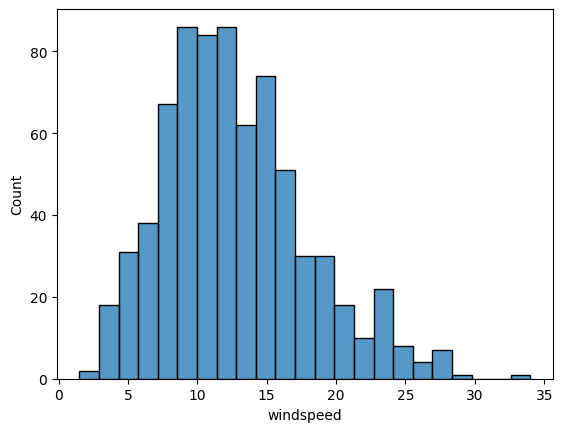

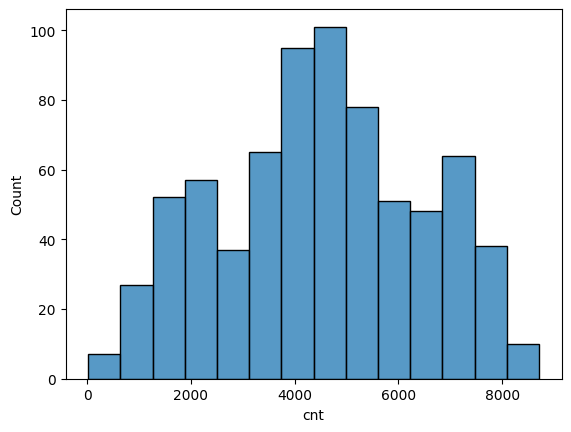

In [13]:
for i in num_columns:
    sns.histplot(x=df[i])
    plt.show()

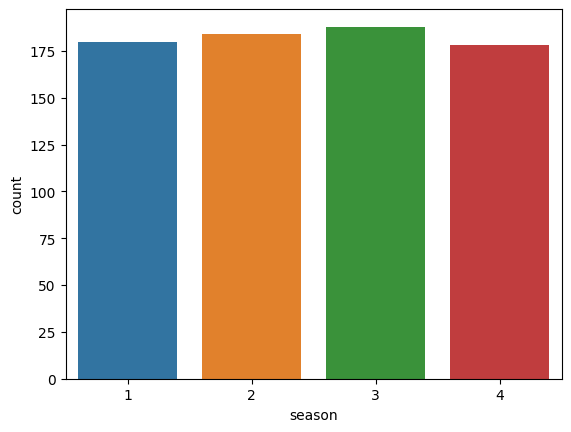

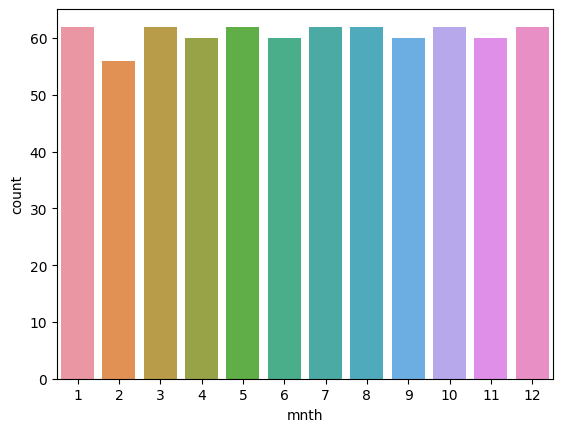

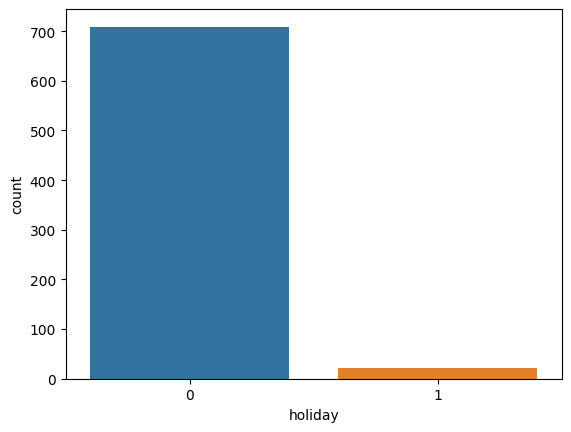

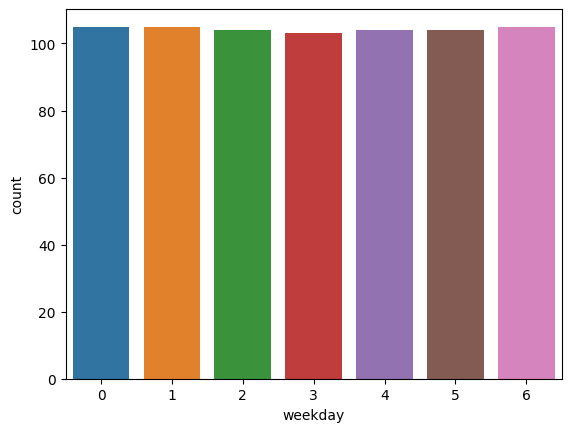

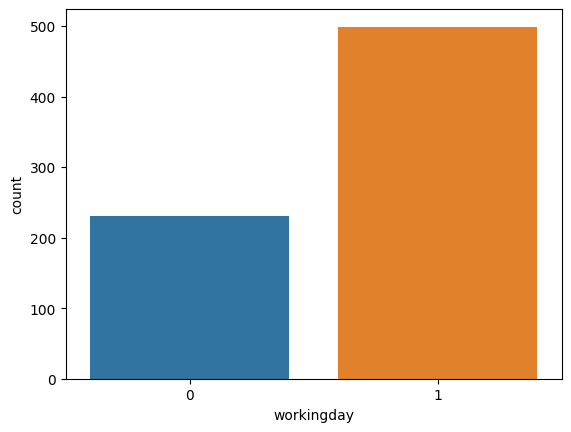

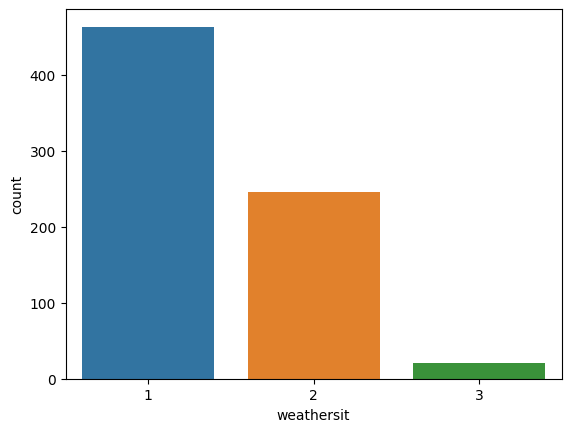

In [14]:
# now plotting categorical columns
for i in cat_columns:
    sns.countplot(x=df[i])
    plt.show()

In [15]:
# there are no data mappings for weathersit = 4

In [16]:
## Bivariate Analysis

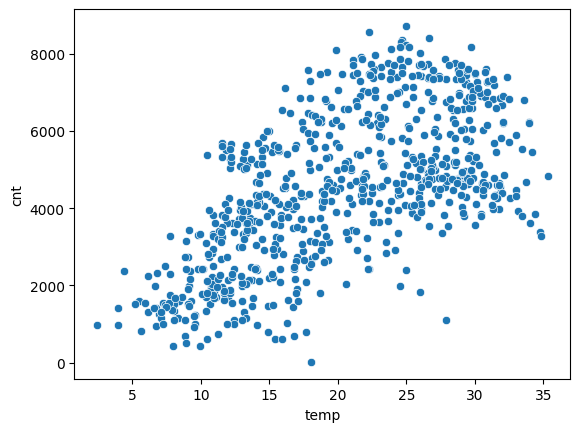

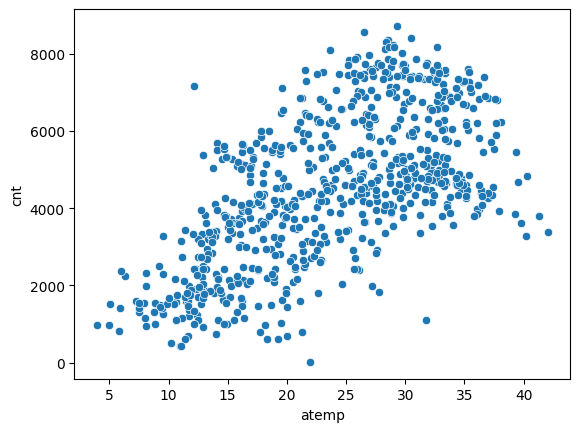

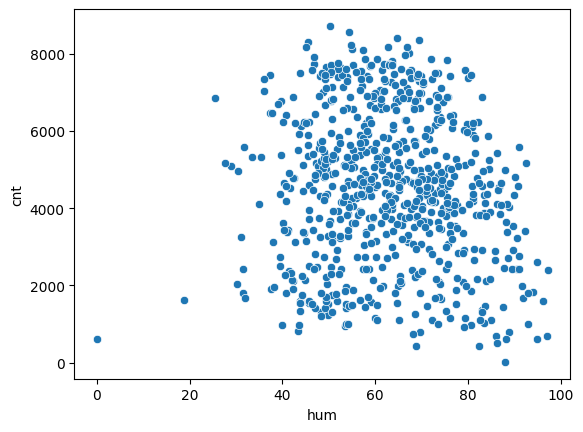

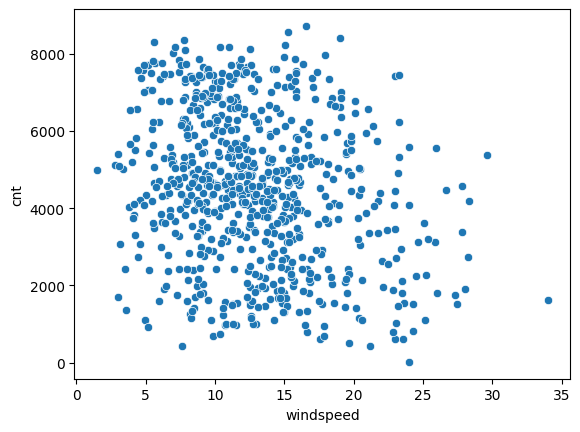

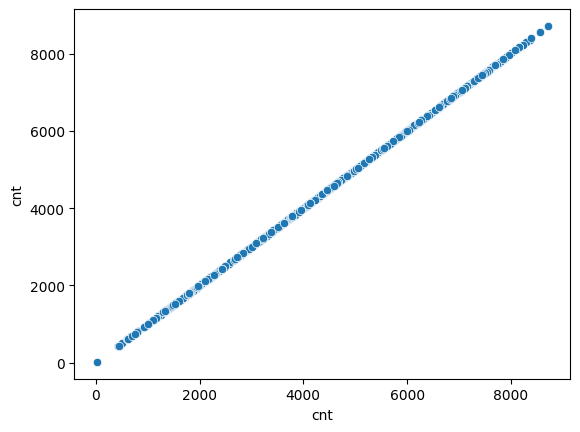

In [17]:
for i in num_columns:
    sns.scatterplot(x=df[i],y=df["cnt"])
    plt.show()

In [18]:
# looking at the scatter plots, it looks like :
# that when windspeed increases, the cnt column descreases i.e. bike booking decreases
# when temp increases, then the cnt column increases i.e. bike booking increases
# the bookings are relatively more when the humidity is b/w 40 to 80

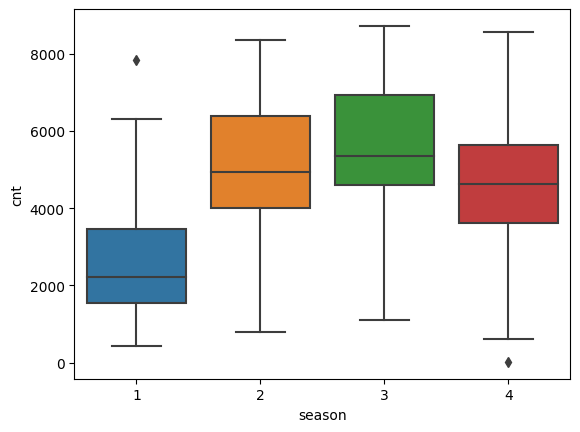

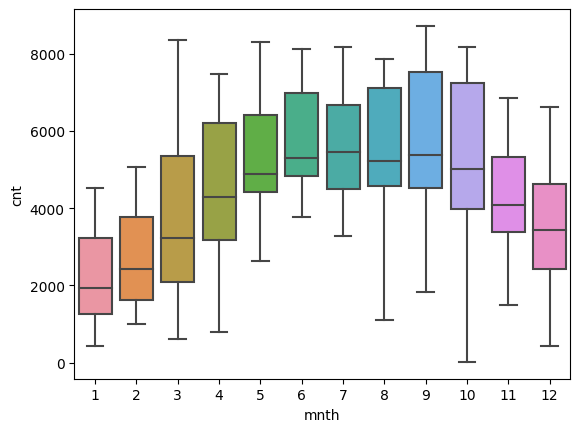

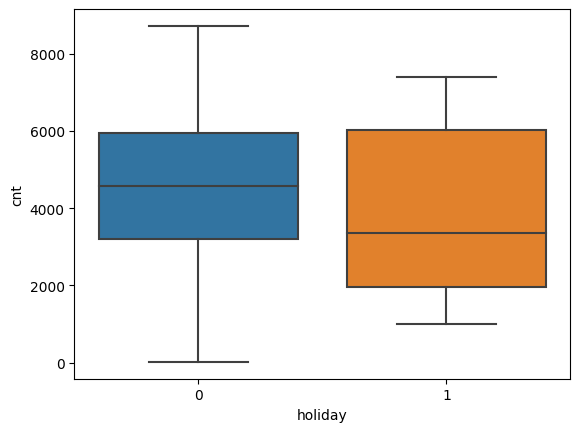

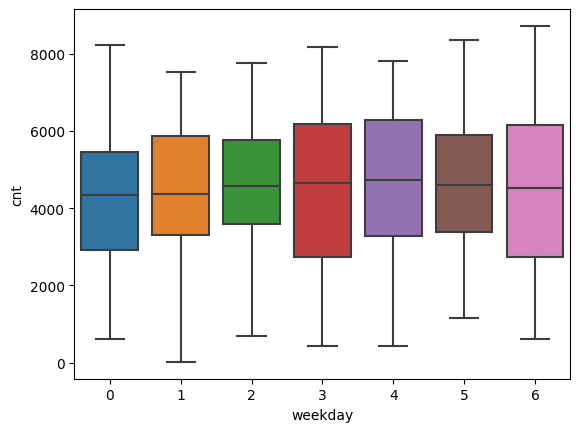

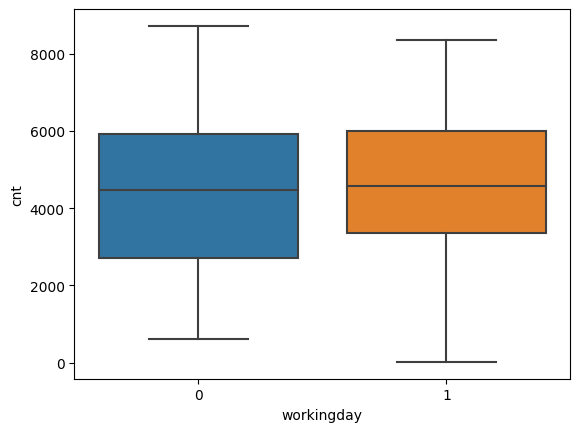

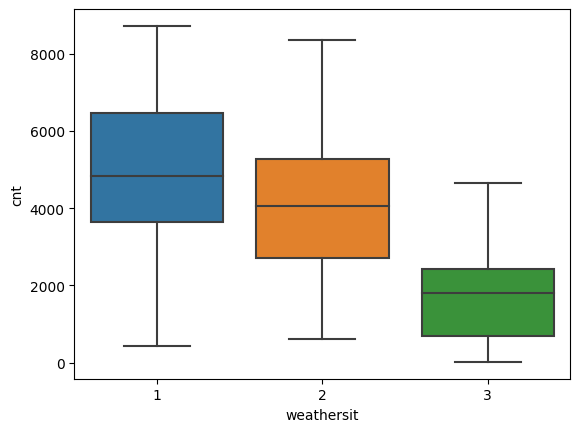

In [19]:
for i in cat_columns:
  sns.boxplot(x=df[i], y=df['cnt'])
  plt.show()

In [20]:
# looking at the box plots of categorical columns, it looks like :
# when weathersit is 1 i.e. clear then we have maximum bookings
# bookings are more for the month of August, september, october i.e. 8,9,10 baed in mnth column

In [21]:
## Pre-processing steps

In [22]:
## Dummy Variable Creation

In [23]:
df[cat_columns].nunique()# Only for non binary categorical columns

season         4
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [24]:
dum=pd.get_dummies(df["season"],drop_first=True,dtype=int)#dummies=n-1
custom_names = ['SEASON' + str(col) for col in dum.columns]
dum.columns = custom_names
dum.head()

,SEASON2,SEASON3,SEASON4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [25]:
df1=pd.concat([df,dum],axis=1)
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,SEASON2,SEASON3,SEASON4
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


In [26]:
dum=pd.get_dummies(df1["mnth"],drop_first=True,dtype=int)#dummies=n-1
custom_names = ['MONTH' + str(col) for col in dum.columns]
dum.columns = custom_names
dum.head()
dum.head()

,MONTH2,MONTH3,MONTH4,MONTH5,MONTH6,MONTH7,MONTH8,MONTH9,MONTH10,MONTH11,MONTH12
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [27]:
df1=pd.concat([df1,dum],axis=1)
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,MONTH3,MONTH4,MONTH5,MONTH6,MONTH7,MONTH8,MONTH9,MONTH10,MONTH11,MONTH12
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [28]:
dum=pd.get_dummies(df1["holiday"],drop_first=True,dtype=int)#dummies=n-1
custom_names = ['HOLIDAY' + str(col) for col in dum.columns]
dum.columns = custom_names
dum.head()

,HOLIDAY1
0,0
1,0
2,0
3,0
4,0


In [29]:
df1=pd.concat([df1,dum],axis=1)
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,MONTH4,MONTH5,MONTH6,MONTH7,MONTH8,MONTH9,MONTH10,MONTH11,MONTH12,HOLIDAY1
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [30]:
dum=pd.get_dummies(df1["weekday"],drop_first=True,dtype=int)#dummies=n-1
custom_names = ['WEEKDAY' + str(col) for col in dum.columns]
dum.columns = custom_names
dum.head()

,WEEKDAY1,WEEKDAY2,WEEKDAY3,WEEKDAY4,WEEKDAY5,WEEKDAY6
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [31]:
df1=pd.concat([df1,dum],axis=1)
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,MONTH10,MONTH11,MONTH12,HOLIDAY1,WEEKDAY1,WEEKDAY2,WEEKDAY3,WEEKDAY4,WEEKDAY5,WEEKDAY6
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,0,0,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,1,0,0,0


In [32]:
dum=pd.get_dummies(df1["weathersit"],drop_first=True,dtype=int)#dummies=n-1
custom_names = ['WEATHER' + str(col) for col in dum.columns]
dum.columns = custom_names
dum.head()

,WEATHER2,WEATHER3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [33]:
df1=pd.concat([df1,dum],axis=1)
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,MONTH12,HOLIDAY1,WEEKDAY1,WEEKDAY2,WEEKDAY3,WEEKDAY4,WEEKDAY5,WEEKDAY6,WEATHER2,WEATHER3
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,1,1,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,1,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,0,0,0


In [34]:
df1.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'SEASON2',
       'SEASON3', 'SEASON4', 'MONTH2', 'MONTH3', 'MONTH4', 'MONTH5', 'MONTH6',
       'MONTH7', 'MONTH8', 'MONTH9', 'MONTH10', 'MONTH11', 'MONTH12',
       'HOLIDAY1', 'WEEKDAY1', 'WEEKDAY2', 'WEEKDAY3', 'WEEKDAY4', 'WEEKDAY5',
       'WEEKDAY6', 'WEATHER2', 'WEATHER3'],
      dtype='object')

In [35]:
df1=df1.drop(['season','mnth','holiday','weekday','workingday','weathersit'],axis=1)

In [36]:
df1.columns

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'SEASON2', 'SEASON3',
       'SEASON4', 'MONTH2', 'MONTH3', 'MONTH4', 'MONTH5', 'MONTH6', 'MONTH7',
       'MONTH8', 'MONTH9', 'MONTH10', 'MONTH11', 'MONTH12', 'HOLIDAY1',
       'WEEKDAY1', 'WEEKDAY2', 'WEEKDAY3', 'WEEKDAY4', 'WEEKDAY5', 'WEEKDAY6',
       'WEATHER2', 'WEATHER3'],
      dtype='object')

In [37]:
# convert all column names to string type
df1.columns=df1.columns.astype(str)

In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   yr         730 non-null    int64  
 1   temp       730 non-null    float64
 2   atemp      730 non-null    float64
 3   hum        730 non-null    float64
 4   windspeed  730 non-null    float64
 5   cnt        730 non-null    int64  
 6   SEASON2    730 non-null    int64  
 7   SEASON3    730 non-null    int64  
 8   SEASON4    730 non-null    int64  
 9   MONTH2     730 non-null    int64  
 10  MONTH3     730 non-null    int64  
 11  MONTH4     730 non-null    int64  
 12  MONTH5     730 non-null    int64  
 13  MONTH6     730 non-null    int64  
 14  MONTH7     730 non-null    int64  
 15  MONTH8     730 non-null    int64  
 16  MONTH9     730 non-null    int64  
 17  MONTH10    730 non-null    int64  
 18  MONTH11    730 non-null    int64  
 19  MONTH12    730 non-null    int64  
 20  HOLIDAY1  

In [39]:
# segregate input and output
X=df1.drop(["cnt"],axis=1)
y=df1["cnt"]

In [40]:
## Train-Test split

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [42]:
X_train=(X_train-X_train.mean())/X_train.std()
X_test=(X_test-X_test.mean())/X_test.std()

In [43]:
## feature selection
#  try to find out the appropriate value for number of features to be used in a model.
# we will run RFE multiple times on different n (features to select)

In [44]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

estimator=LinearRegression()
# Perform RFE with different numbers of features
for num_features in range(6, 20):  # Trying 6 to 15 features
    selector = RFE(estimator, n_features_to_select=num_features)
    selector=selector.fit(X_train,y_train)

    # Evaluate model performance using cross-validation
    scores = cross_val_score(estimator, selector.transform(X_train), y_train, cv=5)
    print(f"Num Features: {num_features}, R^2: {scores.mean():.4f}")

Num Features: 6, R^2: 0.7869
Num Features: 7, R^2: 0.8068
Num Features: 8, R^2: 0.8189
Num Features: 9, R^2: 0.8244
Num Features: 10, R^2: 0.8260
Num Features: 11, R^2: 0.8303
Num Features: 12, R^2: 0.8324
Num Features: 13, R^2: 0.8323
Num Features: 14, R^2: 0.8335
Num Features: 15, R^2: 0.8345
Num Features: 16, R^2: 0.8343
Num Features: 17, R^2: 0.8353
Num Features: 18, R^2: 0.8372
Num Features: 19, R^2: 0.8359


In [45]:
# from n = 11 to n = 19, R sqaure is almost constant. So we will select  n_features_to_select = 11 based on above analysis

In [46]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator=LinearRegression()
estimator.fit(X_train, y_train)
selector=RFE(estimator,n_features_to_select=11)

selector=selector.fit(X_train,y_train)
selector.support_

array([ True,  True, False,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False,  True,
        True])

In [47]:
selected_features=X_train.columns[selector.support_]

In [48]:
X_train=X_train[selected_features]
X_test=X_test[selected_features]
X_train

,yr,temp,hum,windspeed,SEASON2,SEASON3,SEASON4,MONTH9,HOLIDAY1,WEATHER2,WEATHER3
367,0.972135,-1.882464,-1.350708,2.234862,-0.571588,-0.579490,-0.576856,-0.29559,-0.167693,-0.721070,-0.167693
648,0.972135,-0.306487,-1.192918,-0.119042,-0.571588,-0.579490,1.730567,-0.29559,-0.167693,-0.721070,-0.167693
44,-1.026903,-0.417082,-1.818132,2.902856,-0.571588,-0.579490,-0.576856,-0.29559,-0.167693,-0.721070,-0.167693
705,0.972135,-0.937801,0.956630,-0.771166,-0.571588,-0.579490,1.730567,-0.29559,-0.167693,1.384454,-0.167693
379,0.972135,-1.790299,-1.508497,0.771778,-0.571588,-0.579490,-0.576856,-0.29559,-0.167693,-0.721070,-0.167693
...,...,...,...,...,...,...,...,...,...,...,...
578,0.972135,1.449206,0.209346,-0.787100,-0.571588,1.722701,-0.576856,-0.29559,-0.167693,-0.721070,-0.167693
53,-1.026903,-1.485765,-1.480802,-1.237753,-0.571588,-0.579490,-0.576856,-0.29559,-0.167693,-0.721070,-0.167693
350,-1.026903,-1.283410,-0.496252,0.668312,-0.571588,-0.579490,1.730567,-0.29559,-0.167693,1.384454,-0.167693
79,-1.026903,-0.331730,0.765307,1.251638,1.746518,-0.579490,-0.576856,-0.29559,-0.167693,1.384454,-0.167693


In [49]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)#X_train_sm["const"]=1
X_test_sm=sm.add_constant(X_test)

In [50]:
# running the model and getting R sqaured value
model=sm.OLS(y_train,X_train_sm)
linear_model=model.fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     277.0
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          7.58e-221
Time:                        15:27:14   Log-Likelihood:                -4716.2
No. Observations:                 584   AIC:                             9456.
Df Residuals:                     572   BIC:                             9509.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4505.2671     32.530    138.495      0.000    4441.374    4569.160
yr           984.0724     33.060     29.766      0.000     919.139    1049.006
temp        1034.1412     60.594     17.067      0.000     915.127    1153.155
hum         -203.8680     45.112     -4.519      0.000    -292.473    -115.263
windspeed   -256.7345     35.523     -7.227      0.000    -326.506    -186.963
SEASON2      441.3156     52.619      8.387      0.000     337.966     544.666
SEASON3      177.3059     72.132      2.458      0.014      35.631     318.981
SEASON4      615.7868     44.932     13.705      0.000     527.536     704.038
MONTH9       216.8562     35.265      6.149      0.000     147.591     286.122
HOLIDAY1    -148.4386     32.780     -4.528      0.000    -212.822     -84.055
WEATHER2    -211.3885     41.001     -5.156      0.000    -291.920    -130.857
WEATHER3    -347.1389     36.248     -9.577      0.000    -418.334    -275.944
==============================================================================
Omnibus:                       83.879   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.481
Skew:                          -0.768   Prob(JB):                     3.56e-43
Kurtosis:                       5.383   Cond. No.                         4.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# let's calculate vif i.e. collinearity b/w variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train.columns

vif_data["VIF"]=[variance_inflation_factor(X_train.values,i) \
                 for i in range(len(X_train.columns))]
vif_data

,Feature,VIF
0,yr,1.031059
1,temp,3.463705
2,hum,1.919823
3,windspeed,1.190423
4,SEASON2,2.611958
5,SEASON3,4.908312
6,SEASON4,1.904527
7,MONTH9,1.173215
8,HOLIDAY1,1.013666
9,WEATHER2,1.585894


In [52]:
# none of the features have vif > 5, so vif is not a measure based on which we can remove features

In [53]:
# none of the p values is greater than 0.05, so we cannot remove features

In [54]:
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     277.0
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          7.58e-221
Time:                        15:27:42   Log-Likelihood:                -4716.2
No. Observations:                 584   AIC:                             9456.
Df Residuals:                     572   BIC:                             9509.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4505.2671     32.530    138.495      0.0

In [55]:
# we are getting an adjusted R sqaure of 83%

In [56]:
## Residual Analysis on the train data

In [57]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

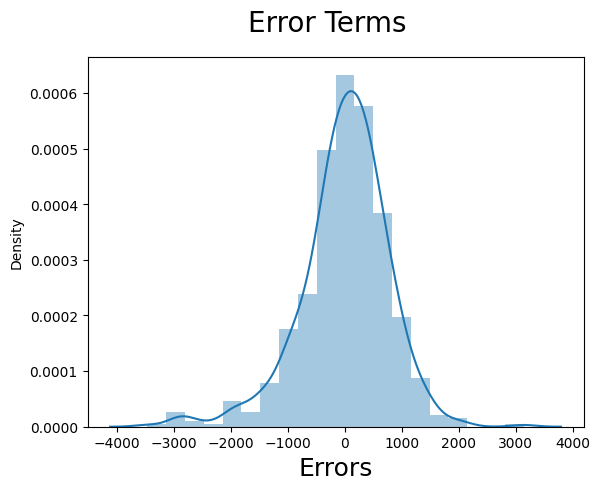

In [58]:
y_train_cnt = linear_model.predict(X_train_sm)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [59]:
## Model evaluation

In [60]:
X_test = sm.add_constant(X_test)

In [61]:
# Making predictions
y_pred = linear_model.predict(X_test)

In [62]:
y_pred

184    3693.502400
535    7779.893662
299    3575.528339
221    5058.222090
152    5217.165173
          ...     
219    4851.205388
719    3030.422077
3      1511.242708
392    4002.053113
360    1406.897765
Length: 146, dtype: float64

Text(0, 0.5, 'y_pred')

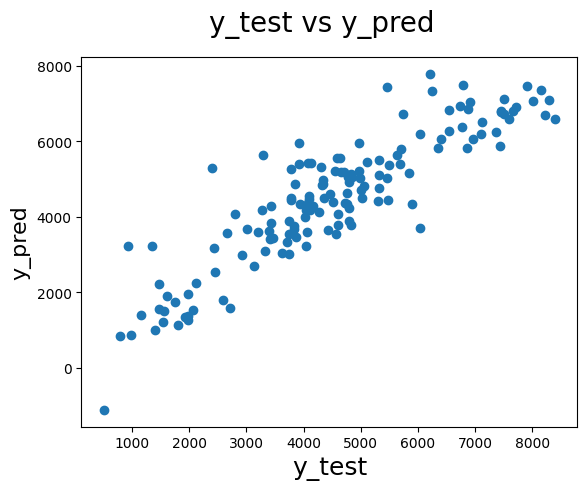

In [63]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [64]:

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7877746762905435

In [66]:
# adjusted r2 score is 78% for test data, which is close enough to the train data